#### Data Preparation

In [1]:
# import necessary modules
import pandas as pd
import numpy as np

In [2]:
data = "C:\\Users\\Dell\\Desktop\\MeriSkill\\diabetes.csv"

In [3]:
# Read data in dataframe
df = pd.read_csv(data)

In [4]:
# Check for first five rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Inspect the dataframe by using the info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Data Wrangling

In [7]:
# Check for sum of null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Dealing with outliers

In [8]:
# Removing outliers using z-score
from scipy.stats import zscore
z_scores = zscore(df['Outcome'])
df_no_outliers = df[(z_scores < 3)]

#### Exploratory Data Analysis

In [9]:
# Get the summary statistics to under distribution
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Check for the occurence of values in a series
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
df["Pregnancies"].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [12]:
# Value count for Age
df["Age"].value_counts().head()

Age
22    72
21    63
25    48
24    46
23    38
Name: count, dtype: int64

##### Correlation Matrix

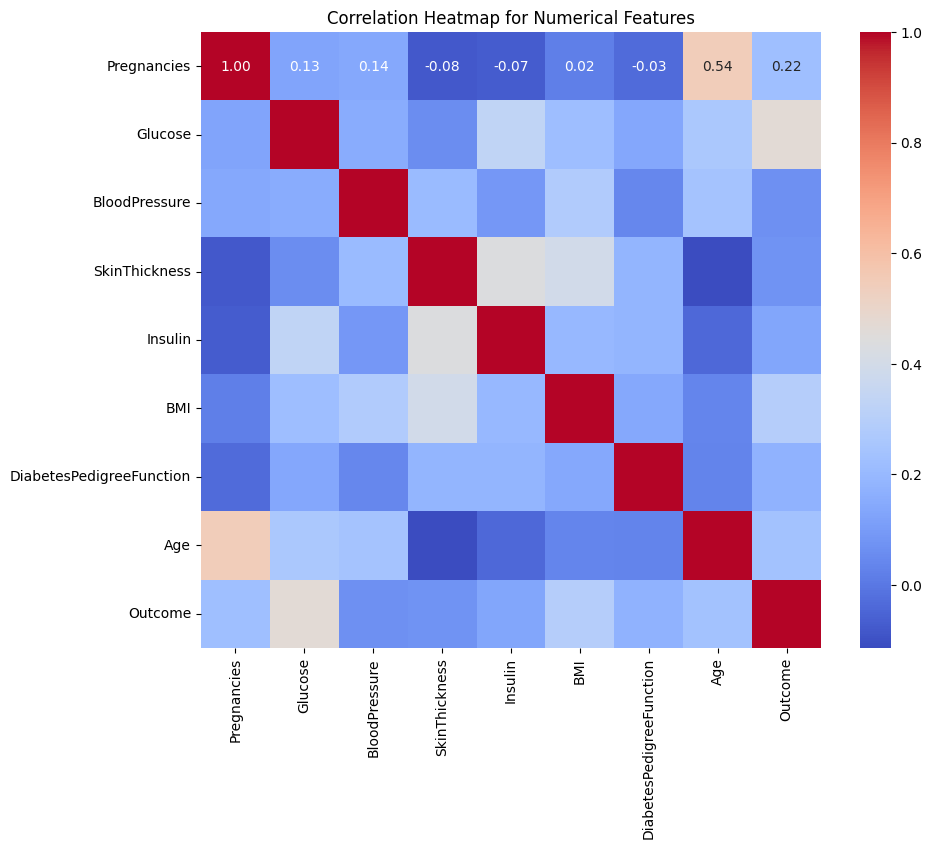

In [13]:
# import necessary modules
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features (excluding "Outcome")
# numerical_features = df.drop(columns=[ 'Outome'])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Numerical Features")
plt.show()


##### Feature Engineering

In [14]:
# Define BMI category boundaries
bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]  # Adjust boundaries as needed
bmi_labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']

# Create a new categorical feature "BMICategory"
df['BMICategory'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)

In [15]:
# Define blood pressure category boundaries
bp_bins = [0, 110, 129, 139, float('inf')]  # Adjust boundaries as needed
bp_labels = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2']

# Create a new categorical feature "BPCategory"
df['BPCategory'] = pd.cut(df['BloodPressure'], bins=bp_bins, labels=bp_labels)

In [43]:
# Define age group boundaries
age_bins = [0, 25, 40, 60, float('inf')]  # Adjust boundaries as needed
age_labels = ['Young Adults', 'Middle-Aged Adults', 'Old-Aged Adults', 'Elderly']

# Create a new categorical feature "AgeGroup"
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [17]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMICategory,BPCategory,AgeGroup
0,6,148,72,35,0,33.6,0.627,50,1,Obese,Normal,Middle-Aged Adults
1,1,85,66,29,0,26.6,0.351,31,0,Overweight,Normal,Middle-Aged Adults
2,8,183,64,0,0,23.3,0.672,32,1,Normal Weight,Normal,Middle-Aged Adults


In [18]:
df['BPCategory'].value_counts()

BPCategory
Normal                  731
Elevated                  2
Hypertension Stage 1      0
Hypertension Stage 2      0
Name: count, dtype: int64

##### Chi Square Test for Independece

In [19]:
# For BMI Category
from scipy.stats import chi2_contingency

# Contingency table for BMICategory vs. Outcome
contingency_table_bmi = pd.crosstab(df['BMICategory'], df['Outcome'])

# Perform chi-squared test
chi2_bmi, p_bmi, dof_bmi, expected_bmi = chi2_contingency(contingency_table_bmi)

# Print chi-squared statistic and p-value
print(f"Chi-squared statistic for BMICategory: {chi2_bmi:.2f}")
print(f"P-value for BMICategory: {p_bmi:.4f}")

Chi-squared statistic for BMICategory: 77.06
P-value for BMICategory: 0.0000


In [20]:
# For BP Category
from scipy.stats import chi2_contingency

# Contingency table for BPCategory vs. Outcome
contingency_table_bmi = pd.crosstab(df['BPCategory'], df['Outcome'])

# Perform chi-squared test
chi2_bmi, p_bmi, dof_bmi, expected_bmi = chi2_contingency(contingency_table_bmi)

# Print chi-squared statistic and p-value
print(f"Chi-squared statistic for BPCategory: {chi2_bmi:.2f}")
print(f"P-value for BMICategory: {p_bmi:.4f}")


Chi-squared statistic for BPCategory: 0.00
P-value for BMICategory: 1.0000


In [21]:
# For Age Group
from scipy.stats import chi2_contingency

# Contingency table for AgeGroup vs. Outcome
contingency_table_bmi = pd.crosstab(df['AgeGroup'], df['Outcome'])

# Perform chi-squared test
chi2_bmi, p_bmi, dof_bmi, expected_bmi = chi2_contingency(contingency_table_bmi)

# Print chi-squared statistic and p-value
print(f"Chi-squared statistic for AgeGroup: {chi2_bmi:.2f}")
print(f"P-value for BMICategory: {p_bmi:.4f}")


Chi-squared statistic for AgeGroup: 79.09
P-value for BMICategory: 0.0000


### Exploratory Data Analysis
1. General Diabetes Statistics:
What is the distribution of diabetes outcomes (1 or 0) in the dataset?
What is the overall prevalence of diabetes in the dataset?
2. Correlation and Relationships:
How do Glucose levels vary for diabetic and non-diabetic individuals?
Is there a correlation between BMI and diabetes outcome?
What is the relationship between Age and diabetes prevalence?
3. Impact of Pregnancy:
How does the number of pregnancies affect the likelihood of diabetes?
Is there a difference in Glucose levels for women with different numbers of pregnancies?
4. Blood Pressure and Skin Thickness:
How does Blood Pressure vary for diabetic and non-diabetic individuals?
Does Skin Thickness have a significant impact on diabetes outcome?
5. Insulin and BMI:
How are Insulin levels distributed among diabetic and non-diabetic patients?
Is there a noticeable difference in BMI for individuals with diabetes?
6. Genetic Factors:
Does the Diabetes Pedigree Function vary significantly for diabetic and non-diabetic individuals?
Are there specific age groups where diabetes tends to be more prevalent?
7. Impact of Lifestyle Factors:
How do BMI categories (Obese, Overweight, Normal Weight) relate to diabetes prevalence?
Is there a connection between Blood Pressure categories (e.g., Normal, High) and diabetes outcomes?
8. Age Groups and Diabetes:
How does the age distribution differ for diabetic and non-diabetic individuals?
Are certain age groups more susceptible to diabetes?


#### 1. General Diabetes Statistics:
1.1 What is the distribution of diabetes outcomes (1 or 0) in the dataset?

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


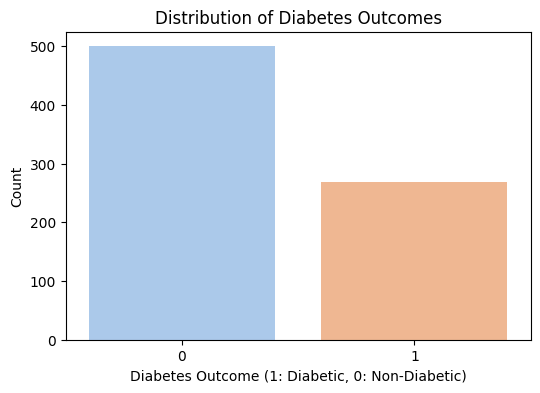

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for diabetes outcomes
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette='pastel')
plt.xlabel('Diabetes Outcome (1: Diabetic, 0: Non-Diabetic)')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Outcomes')
plt.show()

1.2  Overall Prevalence of Diabetes:

In [23]:
# Calculate overall diabetes prevalence
diabetic_count = df['Outcome'].sum()
total_patients = len(df)
diabetes_prevalence = (diabetic_count / total_patients) * 100

print(f"Overall Diabetes Prevalence in the Dataset: {diabetes_prevalence:.2f}%")


Overall Diabetes Prevalence in the Dataset: 34.90%


##### Observation:

1. The dataset consists of 768 observations.
2. Among these, there are 268 cases where the 'Outcome' variable is 1, indicating diabetes.
3. This means that approximately 34.90% of the individuals in the dataset are diagnosed with diabetes.

##### Insights:

Diabetes Prevalence: With approximately 35% of the dataset being diabetic, it's crucial to understand the factors contributing to diabetes in these individuals.


#### 2. Correlation and Relationships:
2.1 How do Glucose levels vary for diabetic and non-diabetic individuals?

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


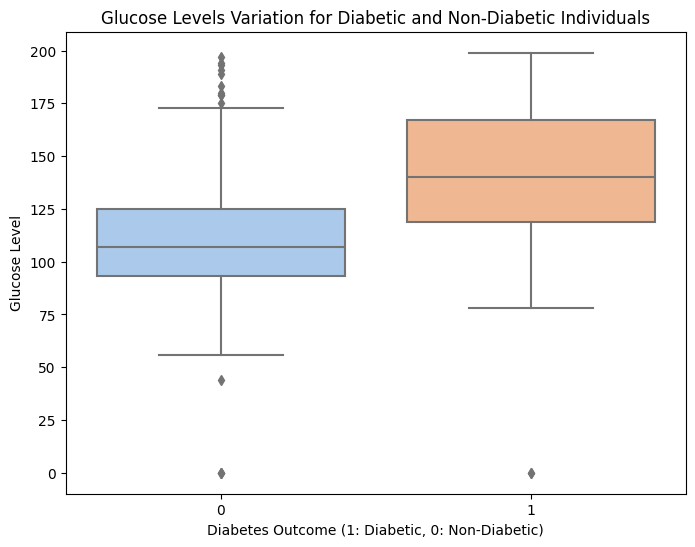

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df, palette='pastel')
plt.xlabel('Diabetes Outcome (1: Diabetic, 0: Non-Diabetic)')
plt.ylabel('Glucose Level')
plt.title('Glucose Levels Variation for Diabetic and Non-Diabetic Individuals')
plt.show()

2.2 Is there a correlation between BMI and diabetes outcome?

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


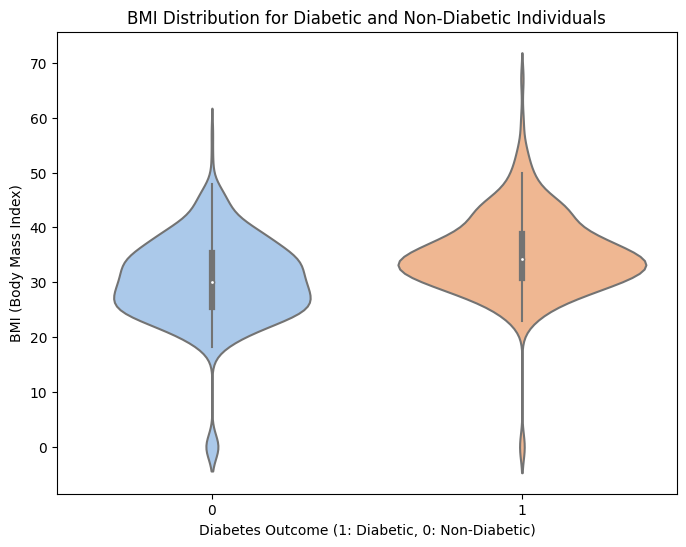

In [25]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Outcome', y='BMI', data=df, palette='pastel')
plt.xlabel('Diabetes Outcome (1: Diabetic, 0: Non-Diabetic)')
plt.ylabel('BMI (Body Mass Index)')
plt.title('BMI Distribution for Diabetic and Non-Diabetic Individuals')
plt.show()

2.3 What is the relationship between Age and diabetes prevalence?

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


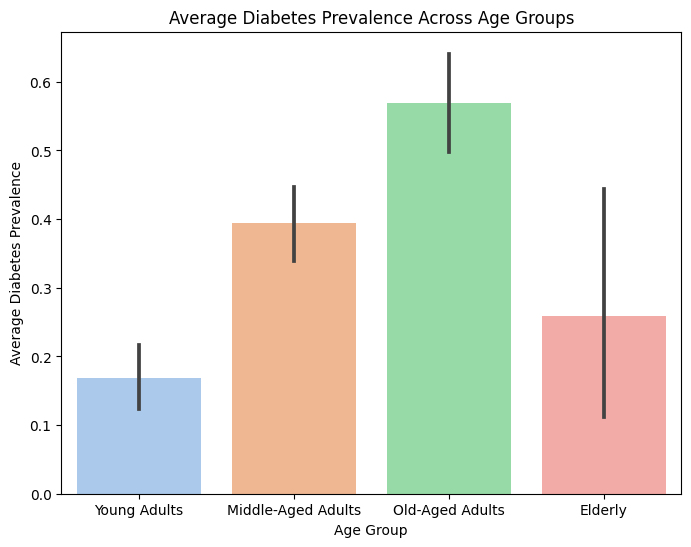

In [44]:
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Outcome', data=df, palette='pastel', estimator=np.mean)
plt.xlabel('Age Group')
plt.ylabel('Average Diabetes Prevalence')
plt.title('Average Diabetes Prevalence Across Age Groups')
plt.show()

##### Observations:
1. The median Glucose level for diabetic patients is approximately 135, while for non-diabetic patients, it is around 115.</n>
2. The median BMI for diabetic patients is around 35, whereas for non-diabetic patients, it is about 30.
3. On average, middle-aged and old-aged individuals have a higher rate of diabetes compared to other age groups.
##### Insights:
1. Glucose Levels and Diabetes Risk: The higher median Glucose level for diabetic patients (around 135) compared to non-diabetic patients (around 115) indicates that individuals with diabetes tend to have higher Glucose levels. This observation emphasizes the importance of monitoring Glucose levels, especially in individuals with a family history of diabetes or other risk factors. Regular monitoring and management of Glucose levels are crucial for diabetes prevention and control.</n>
2. BMI and Diabetes Risk: Diabetic patients exhibit a higher median BMI (around 35) compared to non-diabetic patients (around 30). This suggests that higher BMI is associated with a higher risk of diabetes. It underscores the importance of monitoring and managing BMI levels, especially in individuals with a family history of diabetes or other risk factors. Lifestyle modifications, including diet and exercise, can play a significant role in managing BMI and reducing diabetes risk.</n>
3. Age Group and Diabetes Prevalence: The higher diabetes prevalence among middle-aged individuals underscores the significance of age as a contributing factor. When combined with Glucose levels and BMI, age can provide a more nuanced understanding of diabetes risk. Middle-aged and old-aged adults, especially those with higher Glucose levels and BMI, might benefit from targeted interventions and regular health screenings.

#### 3. Impact of Pregnancy:
3.1 How does the number of pregnancies affect the likelihood of diabetes?

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


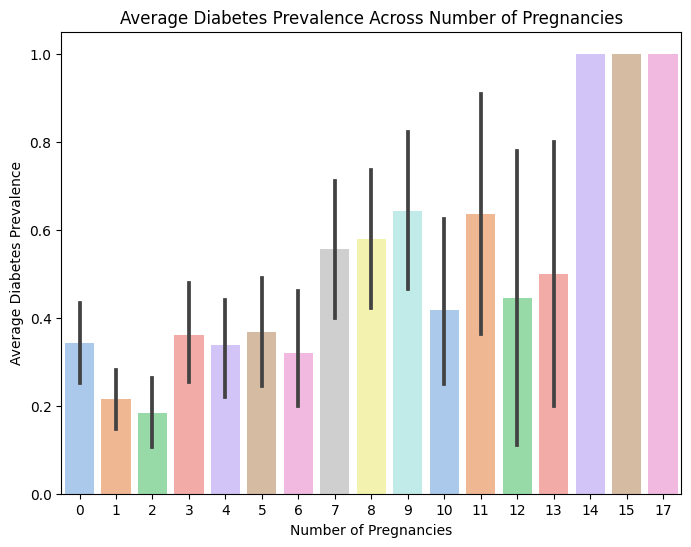

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pregnancies', y='Outcome', data=df, palette='pastel', estimator=np.mean)
plt.xlabel('Number of Pregnancies')
plt.ylabel('Average Diabetes Prevalence')
plt.title('Average Diabetes Prevalence Across Number of Pregnancies')
plt.show()

3.2 Is there a difference in Glucose levels for women with different numbers of pregnancies?

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


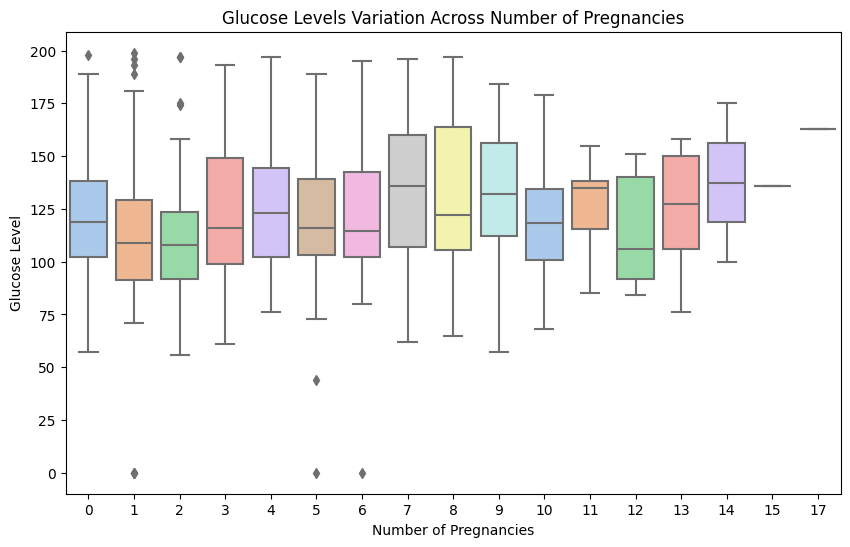

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pregnancies', y='Glucose', data=df, palette='pastel')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Glucose Level')
plt.title('Glucose Levels Variation Across Number of Pregnancies')
plt.show()

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

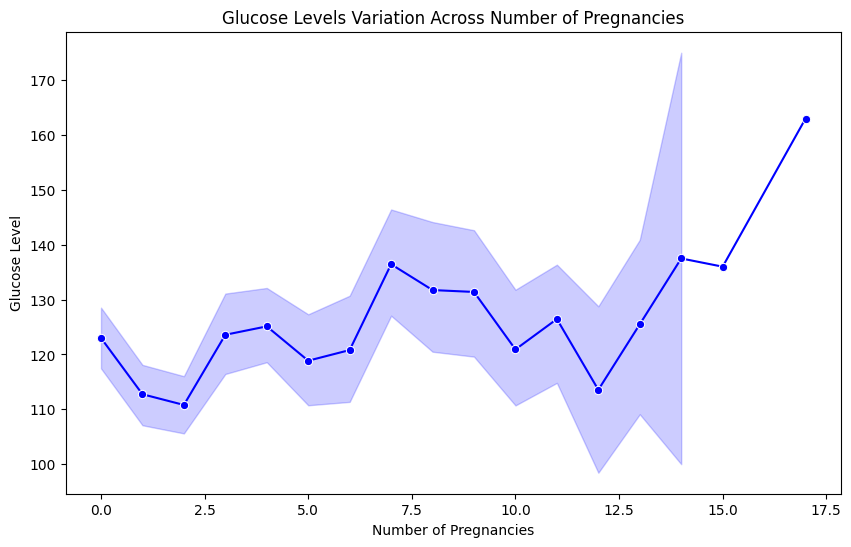

In [29]:
# Since the boxplot is hard to interpret, we use a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Pregnancies', y='Glucose', data=df, marker='o', color='b')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Glucose Level')
plt.title('Glucose Levels Variation Across Number of Pregnancies')
plt.show()

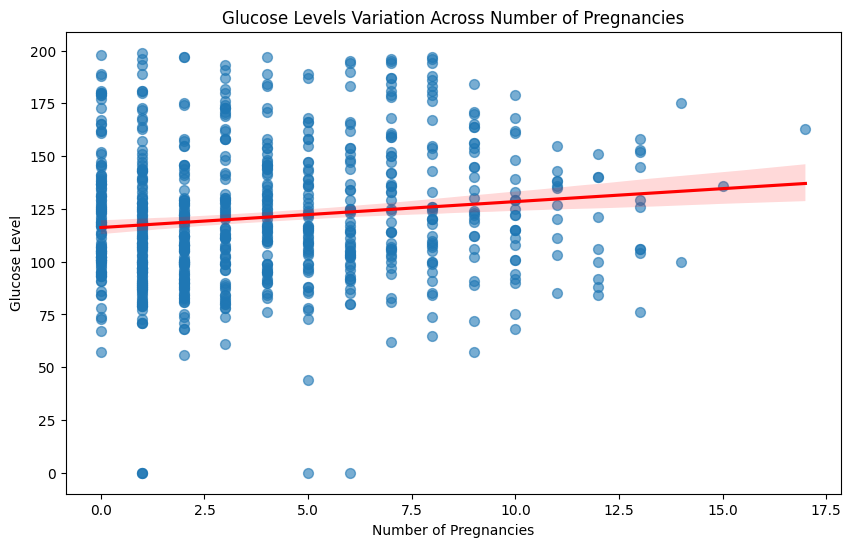

In [30]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Pregnancies', y='Glucose', data=df, scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'red'})
plt.xlabel('Number of Pregnancies')
plt.ylabel('Glucose Level')
plt.title('Glucose Levels Variation Across Number of Pregnancies')
plt.show() #- indicates that there is a linear relationship but it's a weak correlation.

##### Observations:

1. Pregnancies and Diabetes Risk: On average, a higher number of pregnancies is associated with a higher risk of diabetes. This suggests that pregnancy history might be a significant factor contributing to diabetes risk. It's essential for healthcare providers to consider this factor when evaluating diabetes risk in women.
2. Glucose Levels and Pregnancy: The scattered distribution of Glucose levels across different numbers of pregnancies implies that Glucose levels are influenced by various factors other than pregnancy alone. Factors like lifestyle, genetics, and overall health might have a more direct impact on Glucose levels, making it a complex parameter to interpret based solely on the number of pregnancies.
3. Relationship between Glucose Levels and Pregnancies: The scatter plot with a line of best fit indicates a very weak positive correlation between the number of pregnancies and Glucose levels. While there might be a subtle increase in Glucose levels with an increasing number of pregnancies, the effect is minimal and might not be practically significant.

##### Insights:

1. Pregnancy History and Diabetes Risk: Pregnancy history appears to be a nuanced factor in diabetes risk assessment. While a higher number of pregnancies is associated with a higher risk of diabetes, it's important to recognize that other variables play a significant role, making a comprehensive evaluation necessary.
2. Glucose Levels Complexity: The scattered nature of Glucose levels across different pregnancy categories emphasizes the complexity of Glucose regulation. This complexity underscores the importance of considering multiple factors and conducting further analysis to identify significant predictors accurately.
3. Weak Relationship: The weak positive correlation between the number of pregnancies and Glucose levels suggests a subtle influence. While present, this relationship might not have a substantial impact on diabetes risk prediction based solely on the number of pregnancies. Additional factors need to be explored to enhance diabetes risk assessment accuracy.

##### 4. Blood Pressure and Skin Thickness:
4.1 How does Blood Pressure vary for diabetic and non-diabetic individuals?

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


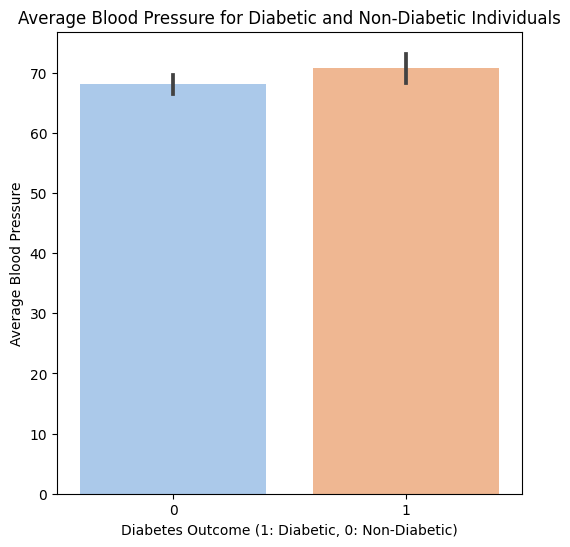

In [31]:
plt.figure(figsize=(6, 6))
sns.barplot(x='Outcome', y='BloodPressure', data=df, estimator=np.mean, palette='pastel')
plt.xlabel('Diabetes Outcome (1: Diabetic, 0: Non-Diabetic)')
plt.ylabel('Average Blood Pressure')
plt.title('Average Blood Pressure for Diabetic and Non-Diabetic Individuals')
plt.show()

4.2 Does Skin Thickness have a significant impact on diabetes outcome?

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


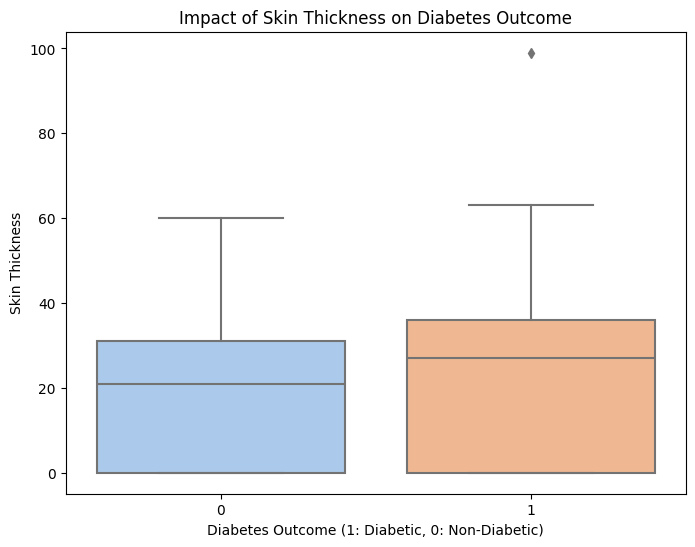

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='SkinThickness', data=df, palette='pastel')
plt.xlabel('Diabetes Outcome (1: Diabetic, 0: Non-Diabetic)')
plt.ylabel('Skin Thickness')
plt.title('Impact of Skin Thickness on Diabetes Outcome')
plt.show()

##### Observations:
1. Average Blood Pressure (BP) Values: Non-diabetic individuals exhibit slightly lower average BP compared to diabetic individuals, indicating a subtle trend. While the difference is not significant, it suggests a potential influence on diabetes outcome.

2. Skin Thickness and Diabetes Outcome: Median Skin Thickness is notably lower for non-diabetic individuals (around 22) compared to diabetic individuals (around 27). This discrepancy hints at a correlation between lower Skin Thickness and diabetes, underscoring the importance of exploring this relationship further.

##### Insights:
1. Blood Pressure Trends: The modest difference in average BP values may imply BP's limited discriminative power between non-diabetic and diabetic groups in this dataset. Factors like BMI and Glucose levels might play more substantial roles in predicting diabetes.

2. Skin Thickness as a Predictor: Lower median Skin Thickness in non-diabetic individuals raises intriguing questions. Further investigation, especially in conjunction with other features, is crucial to assess the depth of this correlation and its clinical implications.

#### 5. Insulin and BMI:
5.1 How are Insulin levels distributed among diabetic and non-diabetic patients?

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


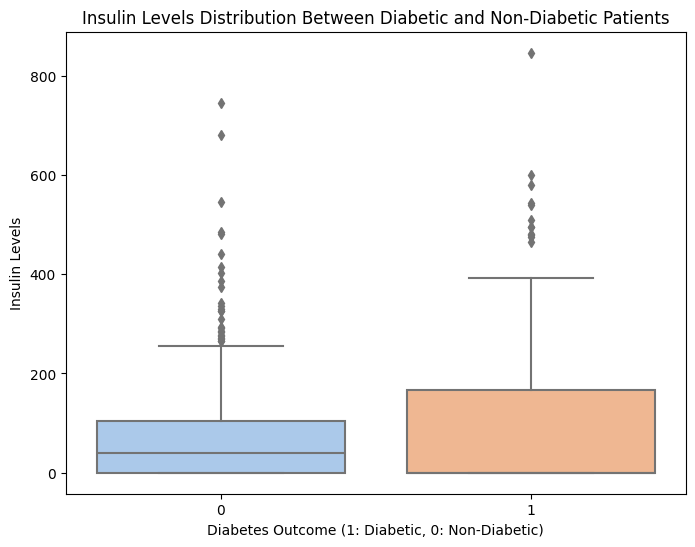

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Insulin', data=df, palette='pastel')
plt.xlabel('Diabetes Outcome (1: Diabetic, 0: Non-Diabetic)')
plt.ylabel('Insulin Levels')
plt.title('Insulin Levels Distribution Between Diabetic and Non-Diabetic Patients')
plt.show()

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


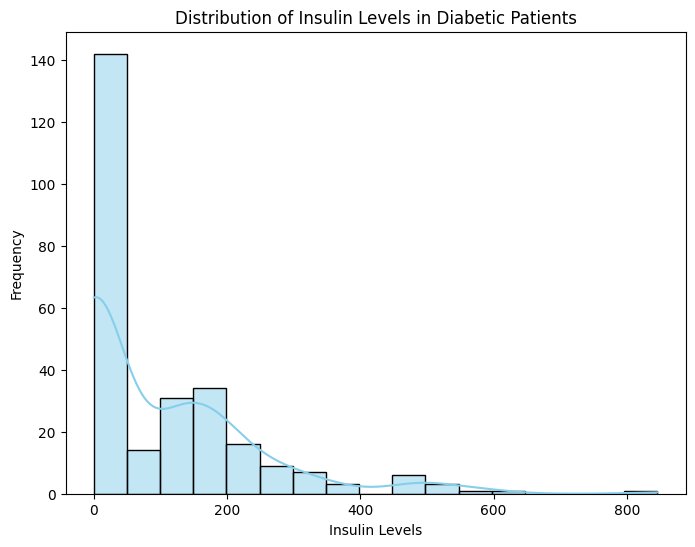

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df['Outcome'] == 1]['Insulin'], kde=True, color='skyblue')
plt.xlabel('Insulin Levels')
plt.ylabel('Frequency')
plt.title('Distribution of Insulin Levels in Diabetic Patients')
plt.show()

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


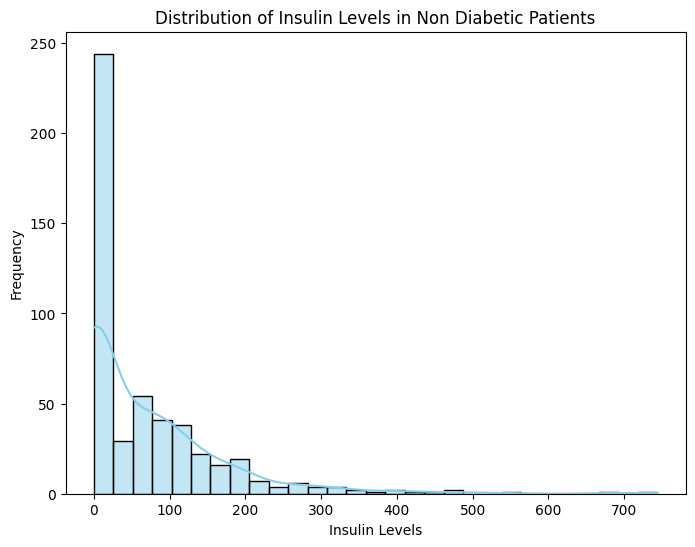

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df['Outcome'] == 0]['Insulin'], kde=True, color='skyblue')
plt.xlabel('Insulin Levels')
plt.ylabel('Frequency')
plt.title('Distribution of Insulin Levels in Non Diabetic Patients')
plt.show()

5.2 Is there a noticeable difference in Insulin and BMI for individuals with diabetes?

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


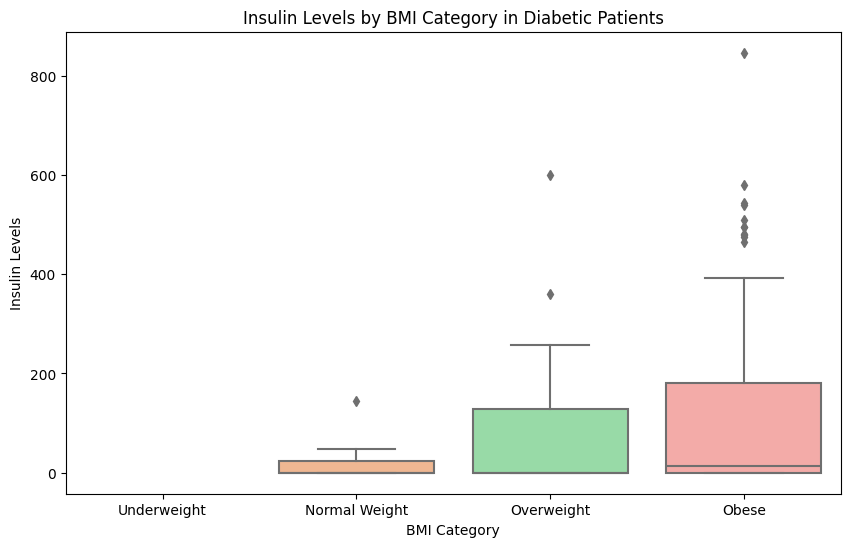

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMICategory', y='Insulin', data=df[df['Outcome'] == 1], palette='pastel')
plt.xlabel('BMI Category')
plt.ylabel('Insulin Levels')
plt.title('Insulin Levels by BMI Category in Diabetic Patients')
plt.show()

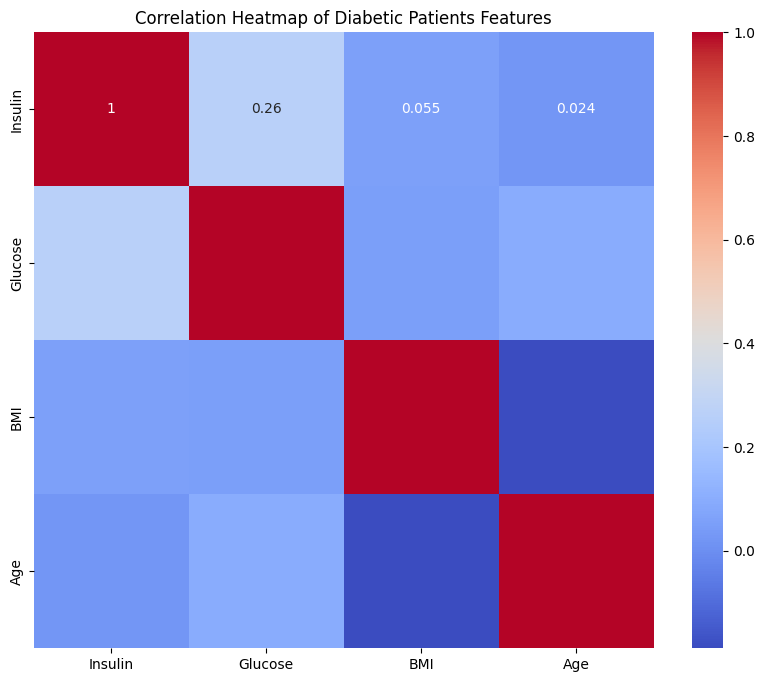

In [39]:
# Correlation heatmap for insulin, age, bmi and gluucose
plt.figure(figsize=(10, 8))
diabetic_features = ['Insulin', 'Glucose', 'BMI', 'Age']
sns.heatmap(df[df['Outcome'] == 1][diabetic_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Diabetic Patients Features')
plt.show()

5.3 Is there a visible correlation between Glucose and Insulin?

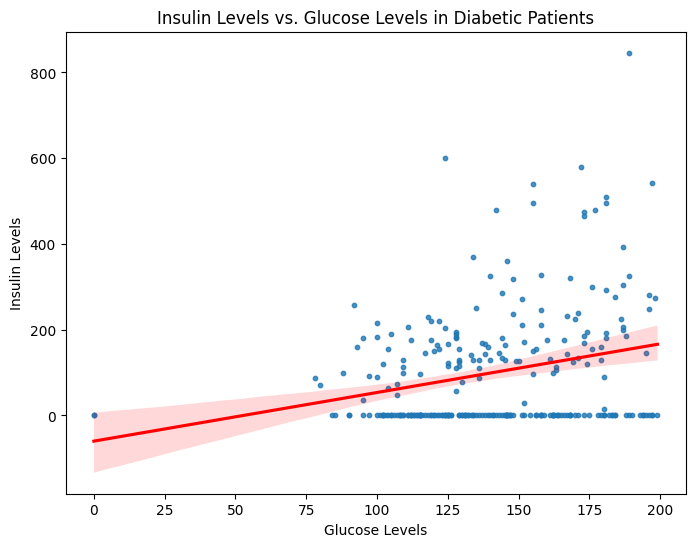

In [40]:
# Insulin-Glucose Plot
plt.figure(figsize=(8, 6))
sns.regplot(x='Glucose', y='Insulin', data=df[df['Outcome'] == 1], scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Glucose Levels')
plt.ylabel('Insulin Levels')
plt.title('Insulin Levels vs. Glucose Levels in Diabetic Patients')
plt.show()

##### Observations:

1. Insulin Levels Distribution: The box plot reveals the distribution of Insulin levels for both non-diabetic and diabetic patients. Among non-diabetic patients, Insulin levels appear concentrated below 50, indicating a distinct pattern within this range. Diabetic patients exhibit a wider spread of Insulin levels, emphasizing the variability within this group.

2. Insulin Levels by BMI Category: The box plot categorized by BMI shows higher variability in Insulin levels among diabetic patients in the "Obese" category. This variability suggests diverse factors influencing Insulin production within obese diabetic individuals. The absence of visible median lines for other BMI categories indicates potential outliers or skewed distributions in Insulin levels within those groups.

3. Insulin Levels Frequency: The histogram highlights a higher frequency of lower Insulin levels among non-diabetic individuals compared to diabetic individuals within specific Insulin ranges. This discrepancy suggests that lower Insulin levels might be more common in non-diabetic cases. The first bar in the histogram, representing a specific range of Insulin levels, has a frequency of approximately 140 for diabetic patients and about 250 for non-diabetic patients.

4. Insulin-Glucose Relationship: The correlation heatmap reveals a moderate positive correlation of 0.26 between Insulin and Glucose levels. Additionally, the scatter plot illustrates a discernible positive trend between Insulin and Glucose levels among diabetic patients. While not highly pronounced, this trend signifies that higher Glucose levels tend to be associated with elevated Insulin levels among diabetic individuals. This relationship aligns with the physiological response where the body produces more Insulin to regulate increased Glucose levels.

##### Insights:

1. Insulin Variability: The wide variability in Insulin levels among diabetic patients underscores the complexity of factors influencing Insulin production in individuals with diabetes. In contrast, the concentration of Insulin levels below 50 in non - diabetic patients hints at a unique physiological response related to no diabetes.

2. Obese Category Variation: The substantial variability in Insulin levels within the "Obese" category emphasizes the diverse factors influencing Insulin production in obese diabetic patients. Exploring these factors can provide deeper insights into the complexities of diabetes within this subgroup.

3. Insulin Levels Frequency Discrepancy: The higher frequency of lower Insulin levels among non-diabetic individuals in specific ranges indicates that lower Insulin levels might be more prevalent in non-diabetic cases. This finding raises questions about the relationship between lower Insulin levels and reduced diabetes risk, necessitating further investigation.

4. Insulin-Glucose Dynamics: The presence of a noticeable trend in the scatter plot reinforces the moderate positive correlation observed in the correlation heatmap. This alignment underscores the interdependence between Glucose and Insulin levels in diabetic patients. Although the correlation is not exceptionally strong, the trend indicates a degree of predictability in Insulin levels based on Glucose levels.

##### 6. Genetic Factors:
6.1 Does the Diabetes Pedigree Function vary significantly for diabetic and non-diabetic individuals?

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


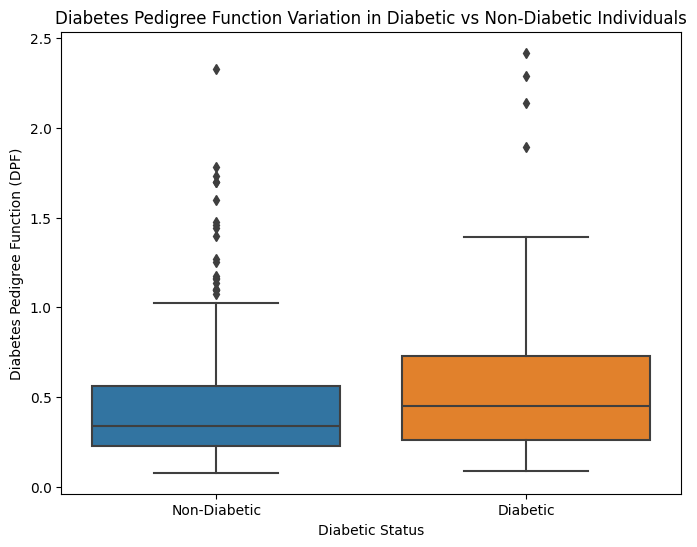

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting DPF for Diabetic and Non-Diabetic Individuals
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.xlabel('Diabetic Status')
plt.ylabel('Diabetes Pedigree Function (DPF)')
plt.title('Diabetes Pedigree Function Variation in Diabetic vs Non-Diabetic Individuals')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\L

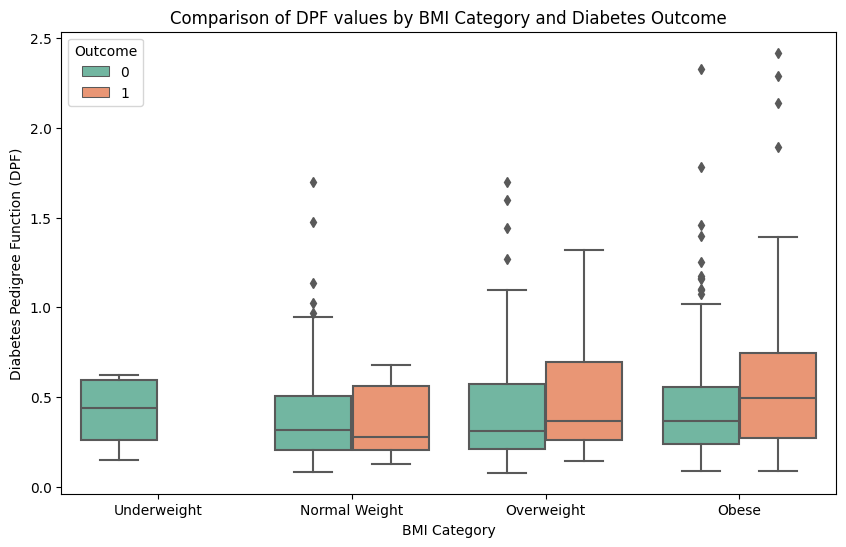

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMICategory', y='DiabetesPedigreeFunction', hue='Outcome', data=df, palette='Set2')
plt.xlabel('BMI Category')
plt.ylabel('Diabetes Pedigree Function (DPF)')
plt.title('Comparison of DPF values by BMI Category and Diabetes Outcome')
plt.show()

##### Observation: 
Diabetic patients, especially those with normal weight, tend to have higher Diabetes Pedigree Function (DPF) values compared to non-diabetic patients.
##### Insight: 
The higher DPF values in diabetic individuals, particularly in the normal-weight category, suggest a stronger genetic predisposition to diabetes. Despite having a normal weight, these individuals exhibit elevated DPF values, indicating a substantial genetic influence on diabetes onset. This finding highlights the significance of genetic factors even in cases where lifestyle-related risk factors might not be immediately apparent.

##### Relationship between BMI and BP

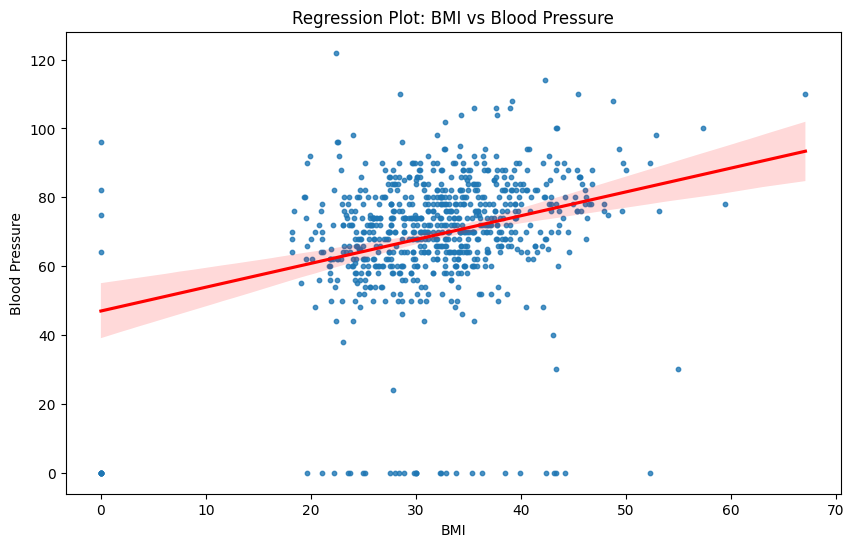

In [54]:
# Create a regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='BMI', y='BloodPressure', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.title('Regression Plot: BMI vs Blood Pressure')
plt.show()

##### Glucose vs DPF across Diabetic and Non Diabetic patients

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

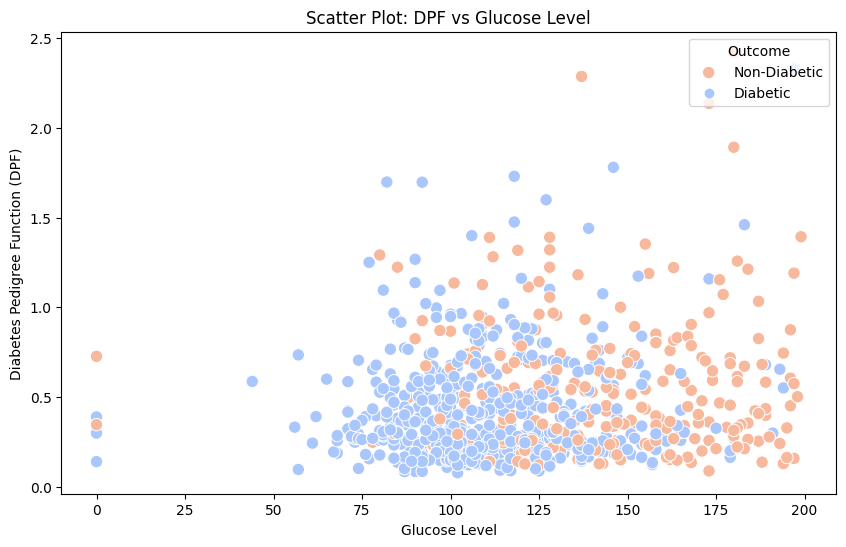

In [55]:
# Create a scatter plot for DPF vs Glucose levels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='DiabetesPedigreeFunction', data=df, hue='Outcome', palette='coolwarm', edgecolor='w', s=80)
plt.xlabel('Glucose Level')
plt.ylabel('Diabetes Pedigree Function (DPF)')
plt.title('Scatter Plot: DPF vs Glucose Level')
plt.legend(title='Outcome', loc='upper right', labels=['Non-Diabetic', 'Diabetic'])
plt.show()


##### Observations:

1. Diabetic Patients (Outcome = 1): Glucose levels among diabetic individuals are concentrated around the 100 mark, indicating a common range for diagnosis.

2. Non-Diabetic Patients (Outcome = 0): Glucose levels in non-diabetic patients show a broader spread, highlighting the natural variability among healthy individuals.

##### Insights:

1. Diagnostic Patterns: The clustering of Glucose levels around 100 suggests a potential diagnostic threshold for diabetes in the dataset.

2. Population Variability: Non-diabetic individuals display diverse Glucose levels, reflecting the natural differences in healthy individuals' Glucose readings.

#### Data Preprocessing

In [56]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMICategory,BPCategory,AgeGroup
0,6,148,72,35,0,33.6,0.627,50,1,Obese,Normal,Old-Aged Adults
1,1,85,66,29,0,26.6,0.351,31,0,Overweight,Normal,Middle-Aged Adults
2,8,183,64,0,0,23.3,0.672,32,1,Normal Weight,Normal,Middle-Aged Adults
3,1,89,66,23,94,28.1,0.167,21,0,Overweight,Normal,Young Adults
4,0,137,40,35,168,43.1,2.288,33,1,Obese,Normal,Middle-Aged Adults


In [58]:
df.isna().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
BMICategory                 11
BPCategory                  35
AgeGroup                     0
dtype: int64

In [63]:
df['BMICategory'].dropna(inplace = True)
df['BPCategory'].dropna(inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   BMICategory               757 non-null    category
 10  BPCategory                733 non-null    category
 11  AgeGroup                  768 non-null    category
dtypes: category(3), float64(2), int64(7)
memory usage: 57.0 KB


In [67]:
# Drop the original columns that have been binned
df.drop(['BMI', 'BloodPressure', 'Age'], axis=1, inplace=True)

##### Label Encoding Binned Features (Ordinal)

In [68]:
from sklearn.preprocessing import LabelEncoder

# Define label encoders for ordinal features
bmi_encoder = LabelEncoder()
bp_encoder = LabelEncoder()
age_encoder = LabelEncoder()

# Encode ordinal features
df['BMICategory'] = bmi_encoder.fit_transform(df['BMICategory'])
df['BPCategory'] = bp_encoder.fit_transform(df['BPCategory'])
df['AgeGroup'] = age_encoder.fit_transform(df['AgeGroup'])


In [69]:
df.head()

,Pregnancies,Glucose,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome,BMICategory,BPCategory,AgeGroup
0,6,148,35,0,0.627,1,1,1,2
1,1,85,29,0,0.351,0,2,1,1
2,8,183,0,0,0.672,1,0,1,1
3,1,89,23,94,0.167,0,2,1,3
4,0,137,35,168,2.288,1,1,1,1


In [72]:
df.shape

(768, 9)

##### Scaling Numerical Features  using Standard Scaler

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Pregnancies', 'Glucose','SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']])
df_scaled = pd.DataFrame(scaled_features, columns=['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction'])
df.drop(columns=['Pregnancies', 'Glucose','SkinThickness', 'Insulin','DiabetesPedigreeFunction'], inplace=True)
df = pd.concat([df, df_scaled], axis=1)

In [77]:
df.head()

,Outcome,BMICategory,BPCategory,AgeGroup,Pregnancies,Glucose,SkinThickness,Insulin,DiabetesPedigreeFunction
0,1,1,1,2,0.639947,0.848324,0.907270,-0.692891,0.468492
1,0,2,1,1,-0.844885,-1.123396,0.530902,-0.692891,-0.365061
2,1,0,1,1,1.233880,1.943724,-1.288212,-0.692891,0.604397
3,0,2,1,3,-0.844885,-0.998208,0.154533,0.123302,-0.920763
4,1,1,1,1,-1.141852,0.504055,0.907270,0.765836,5.484909


##### Remove outliers from the dataframe

In [83]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a function to remove outliers based on IQR for all numeric columns
def remove_outliers(dataframe):
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe >= lower_bound) & (dataframe <= upper_bound)]

# Apply the function to remove outliers for all numeric columns
df = remove_outliers(df)

In [90]:
df.isna().sum()

Outcome                      0
BMICategory                 11
BPCategory                  37
AgeGroup                     0
Pregnancies                  4
Glucose                      5
SkinThickness                1
Insulin                     34
DiabetesPedigreeFunction    29
dtype: int64

In [91]:
df.dropna(inplace=True)

In [92]:
df.isna().sum()

Outcome                     0
BMICategory                 0
BPCategory                  0
AgeGroup                    0
Pregnancies                 0
Glucose                     0
SkinThickness               0
Insulin                     0
DiabetesPedigreeFunction    0
dtype: int64

#### Modeling

##### Split data into train and test set for machine learning modeling

In [93]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (525, 8)
X_test shape: (132, 8)
y_train shape: (525,)
y_test shape: (132,)


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grid_logreg = {'C': [0.1, 1, 10]}
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
param_grid_xgb = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5]}

# Grid Search for Logistic Regression
grid_search_logreg = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5)
grid_search_logreg.fit(X_train, y_train)

# Grid Search for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Grid Search for XGBoost
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train, y_train)

# Print best parameters for each model
print("Logistic Regression Best Parameters:", grid_search_logreg.best_params_)
print("Random Forest Best Parameters:", grid_search_rf.best_params_)
print("XGBoost Best Parameters:", grid_search_xgb.best_params_)

# Use the best models obtained from Grid Search
best_logreg = grid_search_logreg.best_estimator_
best_rf = grid_search_rf.best_estimator_
best_xgb = grid_search_xgb.best_estimator_

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

Logistic Regression Best Parameters: {'C': 0.1}
Random Forest Best Parameters: {'max_depth': 10, 'n_estimators': 150}
XGBoost Best Parameters: {'max_depth': 3, 'n_estimators': 50}


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

##### Define training function

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def training(model, X_train_set, X_test_set):
    model.fit(X_train_set, y_train)
    
    pred = model.predict(X_test_set)
    pred = pred.astype(y_test.dtype)
    
    print('Accuracy score:', accuracy_score(y_test, pred))
    print('Precision score:', precision_score(y_test, pred))
    print('Recall score:', recall_score(y_test, pred))
    print('F1 score:', f1_score(y_test, pred))
    
    print('\nConfusion Matrix:\n', confusion_matrix(y_test, pred))
    print('\nClassification Report:\n', classification_report(y_test, pred))
    
    return model

##### With grid search

In [96]:
# Train and evaluate models using the best parameters obtained from Grid Search
best_logreg = training(best_logreg, X_train, X_test)
best_rf = training(best_rf, X_train, X_test)
best_xgb = training(best_xgb, X_train, X_test)

Accuracy score: 0.75
Precision score: 0.7083333333333334
Recall score: 0.3953488372093023
F1 score: 0.5074626865671642

Confusion Matrix:
 [[82  7]
 [26 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83        89
           1       0.71      0.40      0.51        43

    accuracy                           0.75       132
   macro avg       0.73      0.66      0.67       132
weighted avg       0.74      0.75      0.73       132

Accuracy score: 0.7348484848484849
Precision score: 0.625
Recall score: 0.46511627906976744
F1 score: 0.5333333333333334

Confusion Matrix:
 [[77 12]
 [23 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.81        89
           1       0.62      0.47      0.53        43

    accuracy                           0.73       132
   macro avg       0.70      0.67      0.67       132
weighted avg       0.72      0.73

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

#### Wiithout grid search

#### Using different Models

In [98]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can try different kernels like 'linear', 'rbf', 'poly', etc.

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Predictions and evaluation
svm_predictions = svm_classifier.predict(X_test)

# Evaluate the model
print('SVM Classifier Metrics:')
print('Accuracy:', accuracy_score(y_test, svm_predictions))
print('Precision:', precision_score(y_test, svm_predictions))
print('Recall:', recall_score(y_test, svm_predictions))
print('F1 Score:', f1_score(y_test, svm_predictions))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, svm_predictions))
print('\nClassification Report:')
print(classification_report(y_test, svm_predictions))

# Perform cross-validation
svm_cv_scores = cross_val_score(svm_classifier, X, y, cv=5, scoring='accuracy')
print('Cross-validation scores:', svm_cv_scores)
print('Mean CV Accuracy:', svm_cv_scores.mean())


SVM Classifier Metrics:
Accuracy: 0.7348484848484849
Precision: 0.6538461538461539
Recall: 0.3953488372093023
F1 Score: 0.49275362318840576

Confusion Matrix:
[[80  9]
 [26 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        89
           1       0.65      0.40      0.49        43

    accuracy                           0.73       132
   macro avg       0.70      0.65      0.66       132
weighted avg       0.72      0.73      0.71       132

Cross-validation scores: [0.76515152 0.75       0.7480916  0.79389313 0.80152672]
Mean CV Accuracy: 0.7717325931066389


In [99]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the KNN model
knn_classifier.fit(X_train, y_train)

# Predictions and evaluation
knn_predictions = knn_classifier.predict(X_test)

# Evaluate the model
print('KNN Classifier Metrics:')
print('Accuracy:', accuracy_score(y_test, knn_predictions))
print('Precision:', precision_score(y_test, knn_predictions))
print('Recall:', recall_score(y_test, knn_predictions))
print('F1 Score:', f1_score(y_test, knn_predictions))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, knn_predictions))
print('\nClassification Report:')
print(classification_report(y_test, knn_predictions))

# Perform cross-validation
knn_cv_scores = cross_val_score(knn_classifier, X, y, cv=5, scoring='accuracy')
print('Cross-validation scores:', knn_cv_scores)
print('Mean CV Accuracy:', knn_cv_scores.mean())


KNN Classifier Metrics:
Accuracy: 0.7651515151515151
Precision: 0.6764705882352942
Recall: 0.5348837209302325
F1 Score: 0.5974025974025974

Confusion Matrix:
[[78 11]
 [20 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.83        89
           1       0.68      0.53      0.60        43

    accuracy                           0.77       132
   macro avg       0.74      0.71      0.72       132
weighted avg       0.76      0.77      0.76       132

Cross-validation scores: [0.76515152 0.76515152 0.74045802 0.76335878 0.76335878]
Mean CV Accuracy: 0.7594957205644228


In [100]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression()

# Train the Logistic Regression model
logreg_classifier.fit(X_train, y_train)

# Predictions and evaluation
logreg_predictions = logreg_classifier.predict(X_test)

# Evaluate the model
print('Logistic Regression Metrics:')
print('Accuracy:', accuracy_score(y_test, logreg_predictions))
print('Precision:', precision_score(y_test, logreg_predictions))
print('Recall:', recall_score(y_test, logreg_predictions))
print('F1 Score:', f1_score(y_test, logreg_predictions))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, logreg_predictions))
print('\nClassification Report:')
print(classification_report(y_test, logreg_predictions))

# Perform cross-validation
logreg_cv_scores = cross_val_score(logreg_classifier, X, y, cv=5, scoring='accuracy')
print('Cross-validation scores:', logreg_cv_scores)
print('Mean CV Accuracy:', logreg_cv_scores.mean())


Logistic Regression Metrics:
Accuracy: 0.7424242424242424
Precision: 0.6666666666666666
Recall: 0.4186046511627907
F1 Score: 0.5142857142857143

Confusion Matrix:
[[80  9]
 [25 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        89
           1       0.67      0.42      0.51        43

    accuracy                           0.74       132
   macro avg       0.71      0.66      0.67       132
weighted avg       0.73      0.74      0.72       132

Cross-validation scores: [0.75757576 0.75       0.75572519 0.77862595 0.80152672]
Mean CV Accuracy: 0.7686907240342353


In [102]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# Predictions and evaluation
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the model
print('Random Forest Metrics:')
print('Accuracy:', accuracy_score(y_test, rf_predictions))
print('Precision:', precision_score(y_test, rf_predictions))
print('Recall:', recall_score(y_test, rf_predictions))
print('F1 Score:', f1_score(y_test, rf_predictions))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, rf_predictions))
print('\nClassification Report:')
print(classification_report(y_test, rf_predictions))

# Perform cross-validation
rf_cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
print('Cross-validation scores:', rf_cv_scores)
print('Mean CV Accuracy:', rf_cv_scores.mean())


Random Forest Metrics:
Accuracy: 0.7348484848484849
Precision: 0.6333333333333333
Recall: 0.4418604651162791
F1 Score: 0.5205479452054794

Confusion Matrix:
[[78 11]
 [24 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        89
           1       0.63      0.44      0.52        43

    accuracy                           0.73       132
   macro avg       0.70      0.66      0.67       132
weighted avg       0.72      0.73      0.72       132

Cross-validation scores: [0.77272727 0.78030303 0.76335878 0.76335878 0.77099237]
Mean CV Accuracy: 0.770148045338885


In [101]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the XGBoost model
xgb_classifier.fit(X_train, y_train)

# Predictions and evaluation
xgb_predictions = xgb_classifier.predict(X_test)

# Evaluate the model
print('XGBoost Metrics:')
print('Accuracy:', accuracy_score(y_test, xgb_predictions))
print('Precision:', precision_score(y_test, xgb_predictions))
print('Recall:', recall_score(y_test, xgb_predictions))
print('F1 Score:', f1_score(y_test, xgb_predictions))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, xgb_predictions))
print('\nClassification Report:')
print(classification_report(y_test, xgb_predictions))

# Perform cross-validation
xgb_cv_scores = cross_val_score(xgb_classifier, X, y, cv=5, scoring='accuracy')
print('Cross-validation scores:', xgb_cv_scores)
print('Mean CV Accuracy:', xgb_cv_scores.mean())


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

XGBoost Metrics:
Accuracy: 0.7348484848484849
Precision: 0.6428571428571429
Recall: 0.4186046511627907
F1 Score: 0.5070422535211269

Confusion Matrix:
[[79 10]
 [25 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        89
           1       0.64      0.42      0.51        43

    accuracy                           0.73       132
   macro avg       0.70      0.65      0.66       132
weighted avg       0.72      0.73      0.72       132



c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

Cross-validation scores: [0.74242424 0.77272727 0.77099237 0.71755725 0.77099237]
Mean CV Accuracy: 0.7549386999768679


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

Hypertune KNN Classifier using grid search to see if it will perform better

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # You can adjust these values based on your dataset and requirements
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform Grid Search with cross-validation (5 folds)
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and their corresponding accuracy score
print('Best Parameters:', grid_search.best_params_)
print('Best Accuracy:', grid_search.best_score_)

# Predictions and evaluation using the best model from Grid Search
knn_best = grid_search.best_estimator_
knn_predictions = knn_best.predict(X_test)

# Evaluate the model
print('KNN Metrics:')
print('Accuracy:', accuracy_score(y_test, knn_predictions))
print('Precision:', precision_score(y_test, knn_predictions))
print('Recall:', recall_score(y_test, knn_predictions))
print('F1 Score:', f1_score(y_test, knn_predictions))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, knn_predictions))
print('\nClassification Report:')
print(classification_report(y_test, knn_predictions))


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Accuracy: 0.7847619047619048
KNN Metrics:
Accuracy: 0.7196969696969697
Precision: 0.59375
Recall: 0.4418604651162791
F1 Score: 0.5066666666666667

Confusion Matrix:
[[76 13]
 [24 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        89
           1       0.59      0.44      0.51        43

    accuracy                           0.72       132
   macro avg       0.68      0.65      0.66       132
weighted avg       0.71      0.72      0.71       132



#### Finetuning the Model to achieve a higher recall

In [105]:
df.head()

,Outcome,BMICategory,BPCategory,AgeGroup,Pregnancies,Glucose,SkinThickness,Insulin,DiabetesPedigreeFunction
0,1,1.0,1.0,2,0.639947,0.848324,0.907270,-0.692891,0.468492
1,0,2.0,1.0,1,-0.844885,-1.123396,0.530902,-0.692891,-0.365061
2,1,0.0,1.0,1,1.233880,1.943724,-1.288212,-0.692891,0.604397
3,0,2.0,1.0,3,-0.844885,-0.998208,0.154533,0.123302,-0.920763
5,0,2.0,1.0,1,0.342981,-0.153185,-1.288212,-0.692891,-0.818079


##### FEature Selection

In [106]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
selected_features = X_train.columns[feature_importances.argsort()[-5:][::-1]]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [108]:
pip install imblearn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   ----- --------------------------------- 30.7/235.6 kB 330.3 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/235.6 kB 245.8 kB/s eta 0:00:01
   --------------- ----------------------- 92.2/235.6 kB 438.1 kB/s eta 0:00:01
   ------------------ ------------------- 112.6/235.6 kB 504.4 kB/s eta 0:00:01
   ----------------------- -------------- 143.4/235.6 kB 473.7 kB/s eta 0:00:01
   ---------------------------- --------- 174.1/235.6 kB 499.5 kB/s eta 0:00:01
   -------------------------------------  235.5/235.6 kB 577.6 kB/s eta 0:00:01
   -------------------------------------- 235.6/235.6 kB 497.6 kB/s eta 0:00:0

##### Handling Imbalanced Data

In [109]:
# Using SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

##### K-Fold Cross Validation

In [110]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
accuracy_scores = []

for train_idx, val_idx in kfold.split(X_train_resampled, y_train_resampled):
    X_train_fold, X_val_fold = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[val_idx]
    y_train_fold, y_val_fold = y_train_resampled.iloc[train_idx], y_train_resampled.iloc[val_idx]

    # Train and evaluate your model (use KNN or any other model you prefer)
    # Example with KNN:
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_fold, y_train_fold)
    preds = knn.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, preds)
    accuracy_scores.append(accuracy)

# Calculate the mean accuracy from cross-validation
mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy from K-Fold Cross-Validation:", mean_accuracy)


Mean Accuracy from K-Fold Cross-Validation: 0.7652777777777777


##### Ensemble Method

In [114]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)
rf = RandomForestClassifier()

# List of base models
models = [('Random Forest', rf), ('KNN', knn), ('Logistic Regression', lr)]

In [115]:
# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=models, voting='hard')  # 'hard' for majority voting

# Evaluate the ensemble model using cross-validation
ensemble_scores = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='accuracy')

# Print the mean accuracy of the ensemble model
print("Ensemble Model Accuracy (Cross-Validation):", ensemble_scores.mean())

Ensemble Model Accuracy (Cross-Validation): 0.779047619047619


Using the resampled data

In [121]:
# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=models, voting='hard')  # 'hard' for majority voting

# Evaluate the ensemble model using cross-validation
ensemble_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Print the mean accuracy of the ensemble model
print("Ensemble Model Accuracy (Cross-Validation):", ensemble_scores.mean())

Ensemble Model Accuracy (Cross-Validation): 0.7958333333333334


The ensembled model usinng resampled data pperfoormed better with an accuracy score of 79.6%

Usiing K-fold cross validation

In [122]:
# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=models, voting='hard')  # 'hard' for majority voting

# Evaluate the ensemble model using cross-validation
ensemble_scores = cross_val_score(voting_clf, X_train_fold, y_train_fold, cv=5, scoring='accuracy')

# Print the mean accuracy of the ensemble model
print("Ensemble Model Accuracy (Cross-Validation):", ensemble_scores.mean())

Ensemble Model Accuracy (Cross-Validation): 0.7691454272863568


After training the model

In [116]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [117]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [118]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression Classifier
lr_model = LogisticRegression(random_state=42)

# Train the Logistic Regression model
lr_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [119]:
from sklearn.ensemble import VotingClassifier

# Initialize the Voting Classifier with trained models
ensemble_model = VotingClassifier(estimators=[
    ('random_forest', rf_model),
    ('knn', knn_model),
    ('logistic_regression', lr_model)
], voting='soft')  # Use 'soft' voting for probabilities

# Train the ensemble model
ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('logistic_regression',
                              LogisticRegression(random_state=42))],
                 voting='soft')

In [120]:
from sklearn.metrics import accuracy_score

# Use the ensemble model to make predictions
ensemble_predictions = ensemble_model.predict(X_test)

# Calculate accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

# Print the accuracy score
print("Ensemble Model Accuracy: {:.2f}%".format(ensemble_accuracy * 100))


Ensemble Model Accuracy: 76.52%


In [38]:
# df.to_csv(r"C:\\Users\\Dell\\Desktop\\diabetes_data.csv")